In [1]:
import torch
import nltk
import math
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
nltk.download('punkt')

# reading the text file
#‘text.txt’ file
dprint=0
sample = open("text.txt", "r")
s = sample.read()

# processing escape characters
f = s.replace("\n", " ")
print(f)
data = []

# sentence parsing
for i in sent_tokenize(f):
	temp = []
	# tokenize the sentence into words
	for j in word_tokenize(i):
		temp.append(j.lower())
	data.append(temp)

# Creating Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 512, window = 5, sg = 1)

# 1-The 2-black 3-cat 4-sat 5-on 6-the 7-couch 8-and 9-the 10-brown 11-dog 12-slept 13-on 14-the 15-rug.
word1='black'
word2='brown'
pos1=2
pos2=10
a=model2.wv[word1]
b=model2.wv[word2]

if(dprint==1):
        print(a)

# compute cosine similarity
dot = np.dot(a, b)
norma = np.linalg.norm(a)
normb = np.linalg.norm(b)
cos = dot / (norma * normb)

aa = a.reshape(1,512)
ba = b.reshape(1,512)
cos_lib = cosine_similarity(aa, ba)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug.The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug. The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug. The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug. The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug. The black cat sat on the couch and the brown dog slept on the rug.The cat did not cross the street because it was too wet.The dog sat on the couch near the rug. The black cat sat on the couch and 

In [2]:
pe1=aa.copy()
pe2=aa.copy()
pe3=aa.copy()
paa=aa.copy()
pba=ba.copy()
d_model=512
max_print=d_model
max_length=20
#Computing positional encodings for the word 'black'
for i in range(0, max_print,2):
                pe1[0][i] = math.sin(pos1 / (10000 ** ((2 * i)/d_model)))
                paa[0][i] = (paa[0][i]*math.sqrt(d_model))+ pe1[0][i]
                pe1[0][i+1] = math.cos(pos1 / (10000 ** ((2 * i)/d_model)))
                paa[0][i+1] = (paa[0][i+1]*math.sqrt(d_model))+pe1[0][i+1]
                if dprint==1:
                        print(i,pe1[0][i],i+1,pe1[0][i+1])
                        print(i,paa[0][i],i+1,paa[0][i+1])
                        print("\n")

#print(pe1)
# A  method in Pytorch using torch.exp and math.log
max_len=max_length
pe = torch.zeros(max_len, d_model)
position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
pe[:, 0::2] = torch.sin(position * div_term)
pe[:, 1::2] = torch.cos(position * div_term)
#print(pe[:, 0::2])

In [3]:
#Computing positional encodings for the word 'brown'
for i in range(0, max_print,2):
                pe2[0][i] = math.sin(pos2 / (10000 ** ((2 * i)/d_model)))
                pba[0][i] = (pba[0][i]*math.sqrt(d_model))+ pe2[0][i]

                pe2[0][i+1] = math.cos(pos2 / (10000 ** ((2 * i)/d_model)))
                pba[0][i+1] = (pba[0][i+1]*math.sqrt(d_model))+ pe2[0][i+1]

                if dprint==1:
                        print(i,pe2[0][i],i+1,pe2[0][i+1])
                        print(i,paa[0][i],i+1,paa[0][i+1])
                        print("\n")

print(word1,word2)
#Computing the word, positional and encoding similarities between the words 'black' and 'brown'
cos_lib = cosine_similarity(aa, ba)
print(cos_lib,"word similarity")
cos_lib = cosine_similarity(pe1, pe2)
print(cos_lib,"positional similarity")
cos_lib = cosine_similarity(paa, pba)
print(cos_lib,"positional encoding similarity")
#Printing the word, positional, and encoding embedding values for the words 'black' and 'brown'
if dprint==1:
        print(word1)
        print("embedding")
        print(aa)
        print("positional encoding")
        print(pe1)
        print("encoded embedding")
        print(paa)

        print(word2)
        print("embedding")
        print(ba)
        print("positional encoding")
        print(pe2)
        print("encoded embedding")
        print(pba)

black brown
[[0.99951637]] word similarity
[[0.8600013]] positional similarity
[[0.96224964]] positional encoding similarity


In [3]:
# import softmax from scipy
from scipy.special import softmax
import numpy as np
Q = np.array([0.2, 0.3, 0.5]).reshape(1,-1)
K = np.array([[1.0,0.8, 2.5], [0.35, 0.6, 0.9], [0.9, 0.2, 0.4]])
softmax(np.matmul(Q, K.T)/8**.5, axis=1)

array([[0.42599188, 0.30018604, 0.27382208]])

In [5]:
#Import the necessary libraries. Feel free to add or remove more to your liking
import torch
import nltk
import math
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
import numpy as np
import matplotlib.pyplot as plt
nltk.download('punkt')

#‘text.txt’ file
sample = open("textchallenge.txt", "r")
s = sample.read()

# processing escape characters
f = s.replace("\n", " ")

data = []

# sentence parsing
for i in sent_tokenize(f):
	temp = []
	# tokenize the sentence into words
	for j in word_tokenize(i):
		temp.append(j.lower())
	data.append(temp)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [27]:
# creating skip gram model
model2 = gensim.models.Word2Vec(data,vector_size = 512)


In [28]:
word1='black'
word2='white'
pos1=2
pos2=7
d_model = 512
a=model2.wv[word1].reshape(1,d_model)
b=model2.wv[word2].reshape(1,d_model)

In [29]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(a, b)
print(cos_sim)

[[0.09231263]]


In [36]:
# positional encodings
pe1 = a.copy()
pe2 = b.copy()
pc1 = a.copy()
pc2 = b.copy()

import math

for i in range(0, d_model,2):
    pe1[0][i] = math.sin(pos1 / (10000 ** ((2 * i)/d_model)))
    pc1[0][i] = pe1[0][i] + pc1[0][i]*(d_model)**.5
    pe1[0][i+1] = math.cos(pos1 / (10000 ** ((2 * i)/d_model)))
    pc1[0][i+1] = pe1[0][i+1] + pc1[0][i+1]*(d_model)**.5

    # pe1[0][i] = math.sin(i*.1 / (10000 ** ((2 * i)/d_model)))
    # pe1[0][i+1] = math.cos(i*.1 / (10000 ** ((2 * i)/d_model)))

for i in range(0, d_model,2):
    pe2[0][i] = math.sin(pos2 / (10000 ** ((2 * i)/d_model)))
    pc2[0][i] = pe2[0][i] + pc2[0][i]*(d_model)**.5
    pe2[0][i+1] = math.cos(pos2 / (10000 ** ((2 * i)/d_model)))
    pc2[0][i+1] = pe2[0][i+1] + pc2[0][i+1]*(d_model)**.5

    # pe2[0][i] = math.sin(i*.1 / (10000 ** ((2 * i)/d_model)))
    # pe2[0][i+1] = math.cos(i*.1 / (10000 ** ((2 * i)/d_model)))

cos_sim = cosine_similarity(a, b)
print(cos_sim,"word similarity")
cos_sim_pe = cosine_similarity(pe1, pe2)
print(cos_sim_pe, "position similiraity")
cos_sim_pc = cosine_similarity(pc1, pc2)
print(cos_sim_pc, "position encoding similiraity")


[[0.09231263]] word similarity
[[0.86969095]] position similiraity
[[0.8669504]] position encoding similiraity


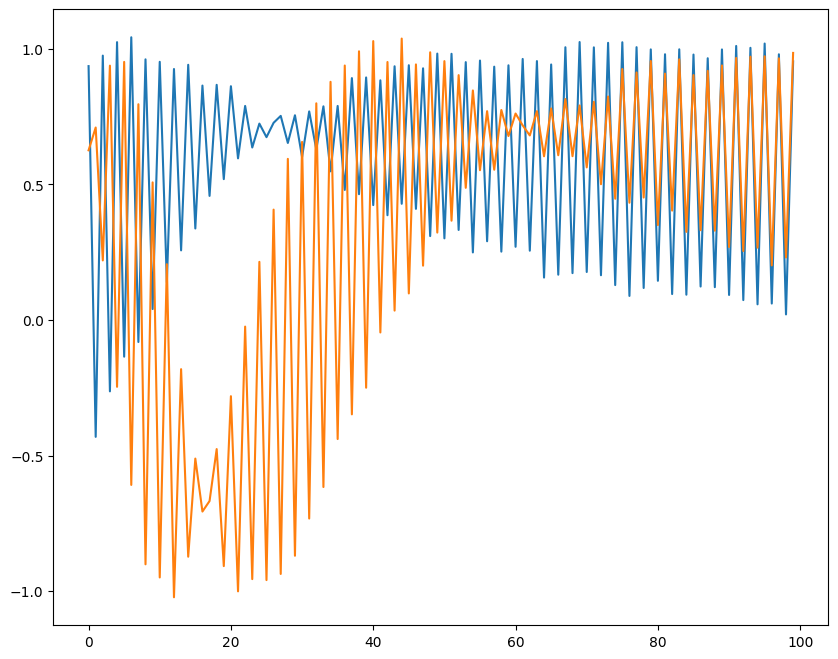

In [34]:
# ploting position encoding similaity
# figsize will be 800 x 1000
plt.figure(figsize=(10,8))
set_val = 100
plt.plot(range(d_model)[:set_val], pc1[0][:set_val], label = word1)
plt.plot(range(d_model)[:set_val], pc2[0][:set_val], label = word2)
plt.show()